In [1]:
# ! pip install nbformat, nbimporter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbimporter
import os
# import sum estimator functions from dpsum.ipynb
from dpsum import ClippedSumEstimator_laplace, SumEstimator_laplace


In [2]:
# load data
df_salary = pd.read_csv("data/Salary_Data.csv")
df_billing = pd.read_csv("data/healthcare_dataset.csv")
df_trade = pd.read_csv("data/commodity_trade_statistics_data.csv")


C:\Users\ltrny\AppData\Local\Temp\ipykernel_34964\4259307314.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_trade = pd.read_csv("data/commodity_trade_statistics_data.csv")


In [3]:
# preprocessing 
# convert float values in billing amount to integer
df_billing['Billing Amount'] = pd.to_numeric(df_billing['Billing Amount'], errors='coerce')
df_billing_cleaned = df_billing.dropna(subset=['Billing Amount'])
df_billing_cleaned['Billing Amount'] = df_billing_cleaned['Billing Amount'].astype(int)

df_salary = df_salary.dropna(subset=["Salary"])

df_trade= df_trade.dropna(subset=["trade_usd"])

### Plot the Attribute Distribution

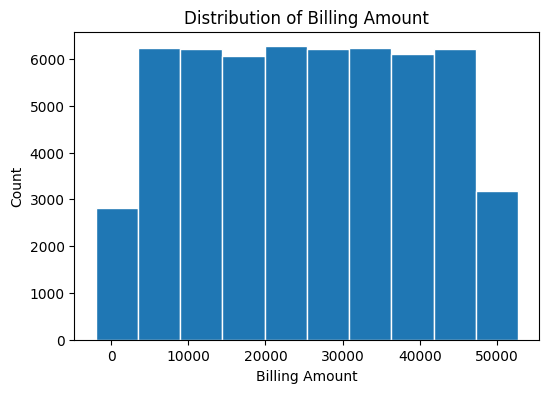

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df_billing_cleaned['Billing Amount'],edgecolor='white')
plt.xlabel('Billing Amount', fontsize=10)
plt.ylabel("Count")
plt.title("Distribution of Billing Amount",fontsize = 12)
plt.show()

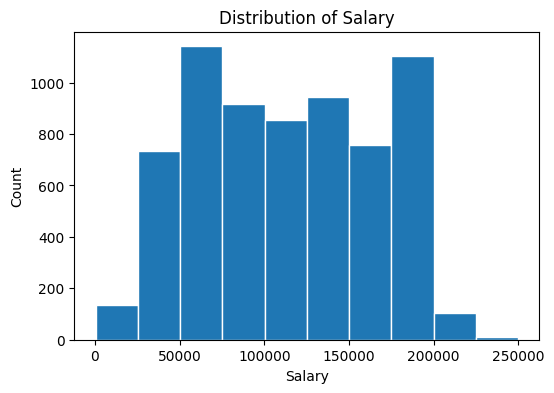

In [5]:
plt.figure(figsize=(6, 4))
plt.hist(df_salary["Salary"], edgecolor='white')
plt.xlabel('Salary', fontsize=10)
plt.ylabel("Count")
plt.title("Distribution of Salary",fontsize = 12)
plt.show()

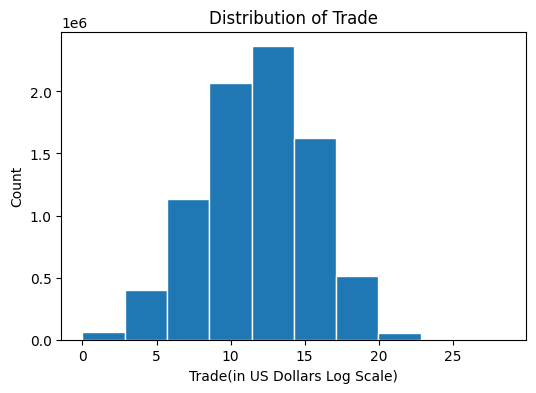

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(np.log(df_trade['trade_usd']), edgecolor='white')
plt.xlabel('Trade(in US Dollars Log Scale)', fontsize=10)
plt.ylabel("Count")
plt.title("Distribution of Trade",fontsize = 12)
plt.show()

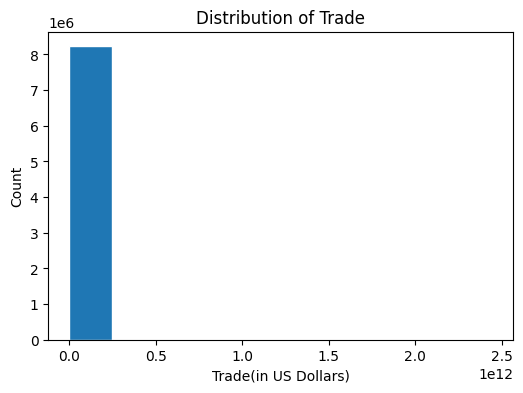

In [7]:
plt.figure(figsize=(6, 4))
plt.hist(df_trade['trade_usd'], edgecolor='white')
plt.xlabel('Trade(in US Dollars)', fontsize=10)
bins = np.logspace(np.log10(df_trade['trade_usd'].min()), np.log10(df_trade['trade_usd'].max()), 50)
plt.ylabel("Count")
# plt.xscale('log')
plt.title("Distribution of Trade",fontsize = 12)
plt.show()

### Experiments

In [8]:
def run_experiment(dataset, value_name, epsilon_list,beta_list, num_iter = 100, global_max = 2147483647):
    """
    Input: attribute, epsilon list, beta list
    """
    # save results
    save_dir = "output"
    os.makedirs(save_dir,exist_ok=True)

    D = dataset[value_name].values
    global_min = 0
    global_max = global_max     
  
    # clipped sum with Laplace noise
    for beta in beta_list:
        for epsilon in epsilon_list:
            results_clipped = []
            for _ in range(num_iter):
                res_clipped = ClippedSumEstimator_laplace(D, global_min, global_max, epsilon, beta)
                results_clipped.append(res_clipped)
            df_clipped = pd.DataFrame(results_clipped)
            filename_clipped= f"{value_name}_ClippedSumEstimator_laplace_epsilon{epsilon}_beta{beta}.csv"
            csv_path_clipped = os.path.join(save_dir, filename_clipped)
            df_clipped.to_csv(csv_path_clipped, index=False)

    # sum estimator with Laplace noise
    for epsilon in epsilon_list:
        results_lap = []
        for _ in range(num_iter):
            res_lap = SumEstimator_laplace(D, global_min, global_max, epsilon)
            results_lap.append(res_lap)
        df_lap = pd.DataFrame(results_lap)
        filename_lap= f"{value_name}_sum_estimator_laplace_epsilon{epsilon}.csv"
        csv_path_lap = os.path.join(save_dir, filename_lap)
        df_lap.to_csv(csv_path_lap, index=False)
    print(f"Finish Dataset {value_name}")
    


In [9]:
# set epsilon and beta
epsilon_list = [0.1,0.25,0.5,1,2]
beta_list = [0.001,0.01,0.1]


In [10]:
run_experiment(df_salary, 'Salary', epsilon_list,beta_list, num_iter = 100)

Finish Dataset Salary


In [12]:
# change the Gmax to 64-bit maximum value
run_experiment(df_trade, 'trade_usd', epsilon_list,beta_list, num_iter = 100,global_max = 9223372036854775807)

Finish Dataset trade_usd


In [13]:
# change the Gmax to 64-bit maximum value
run_experiment(df_billing_cleaned, 'Billing Amount', epsilon_list,beta_list, num_iter = 100)

Finish Dataset Billing Amount
